#### Brief description of the data set and a summary of its attributes
Xti spot oil data of a trading company that contain date,Instrument, Leverage,Rate,Commission,Volume & Customer PnL

#### Initial plan for data exploration
check the data of custoemers in terms of distribution in order to derive a conclusion if they lean torwards losing

In [1]:
# read the data to a Dataframe
import pandas as pd
XTI= pd.read_excel('Data XTI customers.xlsx')

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
XTI.head(5)

,Date,Instrument,Leverage,Rate,Commission,Volume,Customer PnL
0,2020-01-01,XTI/USD,Leverage 1,61.09,0.00177,0.088425,0.04716
1,2020-01-01,XTI/USD,Leverage 2,61.09,0.00074,0.002749,-0.01177
2,2020-01-01,XTI/USD,Leverage 5,61.09,0.01628,0.041259,-0.09791
3,2020-01-01,XTI/USD,Leverage 10,61.09,0.31071,1.144188,-0.62182
4,2020-01-01,XTI/USD,Leverage 20,61.09,0.02649,0.203825,0.02714


In [4]:
XTI.columns

Index(['Date', 'Instrument', 'Leverage', 'Rate', 'Commission', 'Volume',
       'Customer PnL'],
      dtype='object')

In [5]:
XTI['Date'] = pd.to_datetime(XTI['Date'])

#### Actions taken for data cleaning and feature engineering
Remove Unwanted observations (outliers for commission and customers pnl)

In [6]:
import pandas as pd
from scipy import stats
XTI['z_score']=stats.zscore(XTI['Commission'])

In [7]:
XTI=XTI.loc[XTI['z_score'].abs()<=3]

In [8]:
import pandas as pd
from scipy import stats
XTI['z_score']=stats.zscore(XTI['Customer PnL'])

In [9]:
XTI=XTI.loc[XTI['z_score'].abs()<=3]

In [10]:
CummulativeXTI=XTI.groupby(['Leverage','Date','Rate']).sum().groupby(level=[0]).cumsum()

In [11]:
CummulativeXTI=CummulativeXTI.reset_index()

In [12]:
CummulativeXTI.head(5)

,Leverage,Date,Rate,Commission,Volume,Customer PnL,z_score
0,Leverage 1,2020-01-01,61.09,0.00177,0.088425,0.04716,0.026896
1,Leverage 1,2020-01-02,61.09,0.03638,0.209745,-0.97458,0.051042
2,Leverage 1,2020-01-03,62.80,0.10935,0.586433,13.22024,0.114343
3,Leverage 1,2020-01-06,63.22,0.20214,1.034320,13.33330,0.141409
4,Leverage 1,2020-01-07,62.62,0.25333,1.184999,24.15440,0.196028


In [13]:
CummulativeXTI= CummulativeXTI[['Date', 'Leverage', 'Rate', 'Commission', 'Volume','Customer PnL']]

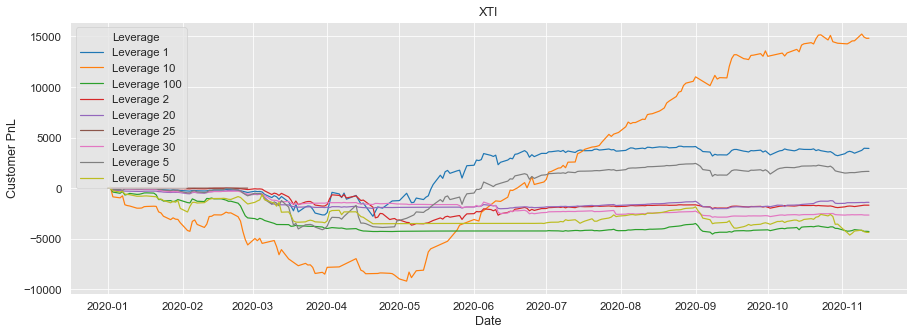

In [14]:
import seaborn as sns
sns.set_style("darkgrid",  {"axes.facecolor": "1.9"})
sns.set_context("paper", font_scale=1.3)  
plt.figure(figsize=(15,5))
Top10Countries_chart = sns.lineplot(x='Date',
                         y='Customer PnL' , 
                         hue='Leverage',
                         data=CummulativeXTI
                         ).set_title('XTI')
plt.show()

In [15]:
XTItotal=XTI.groupby(['Date','Rate']).sum().groupby(level=[0]).sum()

In [16]:
XTItotal=XTItotal.reset_index()

In [17]:
XTItotal['Customer PnL']=XTItotal['Customer PnL']

In [18]:
XTItotal['Commission']=XTItotal['Commission']

In [19]:
XTItotal['Volume']=XTItotal['Volume']

#### Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
Probability distribution is normal of customers PnL

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B881C5C708>,
      dtype=object)

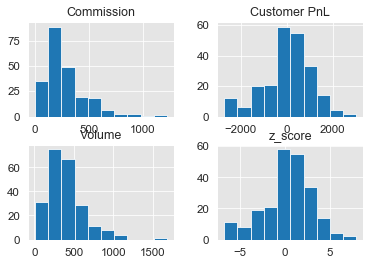

In [20]:
XTItotal.hist()

#### Formulating at least 3 hypothesis about this data
they lose most of time, the features of leverage can give a solution if to hedge them or not,the distribution is not symmetric

In [21]:
Customer_PnL=XTItotal['Customer PnL']

In [22]:
Commission=XTItotal['Commission']

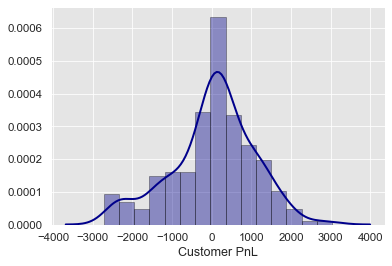

In [23]:
sns.distplot(Customer_PnL, hist=True, kde=True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

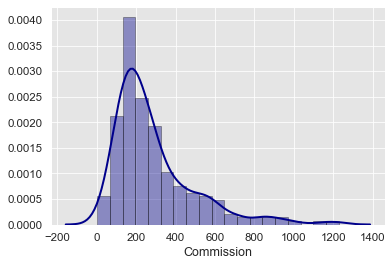

In [24]:
sns.distplot(Commission, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

#### Conducting a formal significance test for one of the hypotheses and discuss the results
the customers PnL in distributed in normalized fashion

In [25]:
Customer_PnL.describe()

count     226.000000
mean       26.513273
std      1056.701414
min     -2727.598050
25%      -496.029408
50%       109.068565
75%       703.449405
max      3035.905300
Name: Customer PnL, dtype: float64

In [26]:
Commission.describe()

count     226.000000
mean      286.984515
std       206.111383
min         3.162320
25%       152.336183
50%       223.677120
75%       352.380110
max      1226.188950
Name: Commission, dtype: float64

In [27]:
XTI_1= XTI[['Leverage', 'Commission', 'Volume','Customer PnL']]

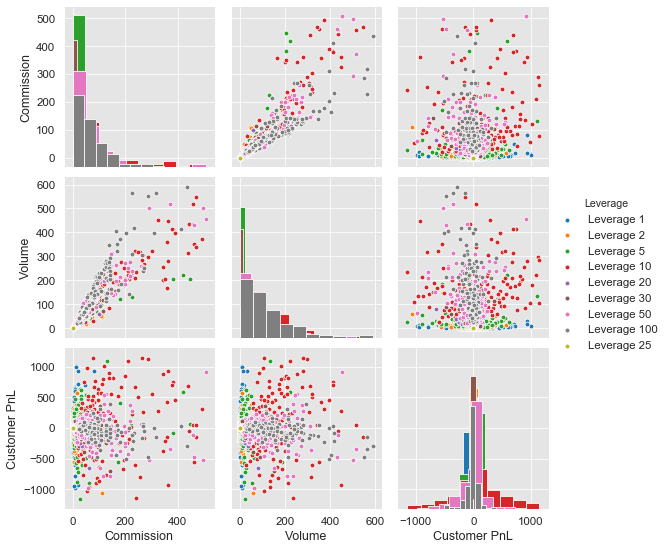

In [28]:
sns.pairplot(XTI_1, hue="Leverage", diag_kind="hist")

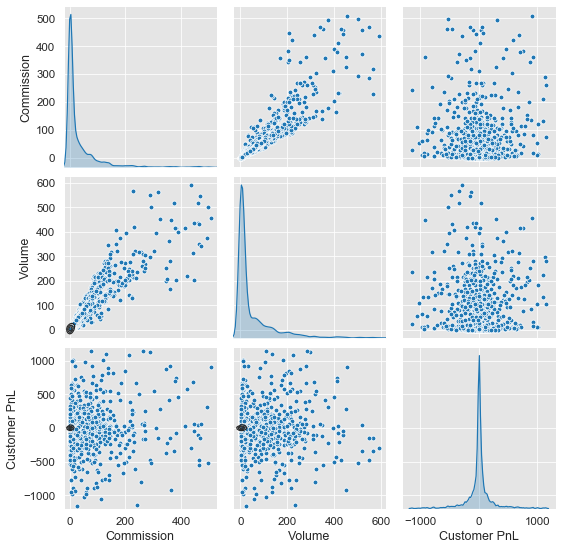

In [29]:
g = sns.pairplot(XTI_1, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=3, color=".2")

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import math
from scipy.stats import binom

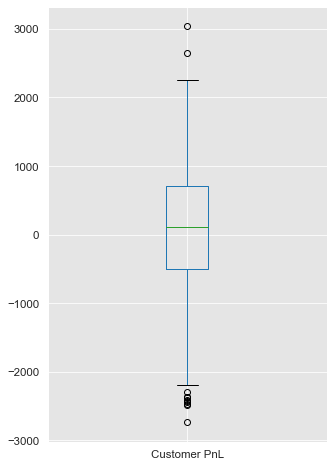

In [31]:
Customer_PnL.plot(kind='box', figsize=[5,8])

In [32]:
def get_summary_statistics(dataset):
    
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
print('\n\nCustomer_PnL summary statistics')
get_summary_statistics(Customer_PnL)



Customer_PnL summary statistics
Min: -2727.6
Mean: 26.51
Max: 3035.91
25th percentile: -496.03
Median: 109.07
75th percentile: 703.45
Interquartile range (IQR): 1199.48


#### Suggestions for next steps in analyzing this data
see if you can decide based on the feature of leverage if yes/no to hedge
#### A paragraph that summarizes the quality of this data set and a request for additional data if needed
we should use more features i.e. daily change of rate, wider time frame